In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyod.utils.data import get_outliers_inliers
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

Data Preprocessing

In [19]:
aloi = pd.read_csv(r"C:\Users\purav\OneDrive\Desktop\Comparative Evaluation of Anomaly Detection Algorithms\Comparative-Evaluation-of-Anomaly-Detection-Algorithms\Datasets\aloi-unsupervised-ad.csv", header = None)

In [20]:
aloi

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.872812,0.000005,0.000000,0.000036,0.000000,0.000000,0.0,0.000000,0.000000,0.050327,...,0.014212,0.000104,0.0,0.025490,0.004937,0.000011,0.000054,0.006804,0.015385,o
1,0.975206,0.000000,0.000000,0.000651,0.000000,0.000000,0.0,0.000000,0.000000,0.007039,...,0.000000,0.000000,0.0,0.004853,0.001582,0.000000,0.000000,0.000201,0.000000,o
2,0.963777,0.000000,0.000000,0.002005,0.000000,0.000000,0.0,0.000000,0.000000,0.006642,...,0.000000,0.000000,0.0,0.007828,0.002523,0.000000,0.000393,0.003800,0.000000,o
3,0.973246,0.000000,0.000000,0.000556,0.000000,0.000000,0.0,0.000000,0.000000,0.008979,...,0.000000,0.000000,0.0,0.004392,0.000170,0.000000,0.000000,0.000007,0.000000,o
4,0.960720,0.000000,0.000000,0.000656,0.000000,0.000000,0.0,0.000000,0.000000,0.013319,...,0.000000,0.000000,0.0,0.010299,0.000561,0.000000,0.000084,0.000264,0.000000,o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.967972,0.000319,0.000000,0.000520,0.000267,0.000002,0.0,0.000000,0.000000,0.000746,...,0.000000,0.000000,0.0,0.000043,0.000170,0.000002,0.000043,0.004716,0.004415,n
49996,0.974542,0.000472,0.000000,0.000723,0.000380,0.000007,0.0,0.000000,0.000000,0.000821,...,0.000000,0.000000,0.0,0.000038,0.000081,0.000000,0.000047,0.004734,0.001964,n
49997,0.980091,0.000671,0.000000,0.000845,0.000402,0.000011,0.0,0.000002,0.000000,0.000497,...,0.000000,0.000000,0.0,0.000054,0.000149,0.000000,0.000052,0.003603,0.002055,n
49998,0.981312,0.000830,0.000002,0.000285,0.000368,0.000041,0.0,0.000002,0.000005,0.000355,...,0.000000,0.000000,0.0,0.000106,0.000158,0.000029,0.000066,0.003493,0.002459,n


In [21]:
shuffled_df = aloi.sample(frac=1).reset_index(drop=True)
shuffled_df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.854865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.053157,...,0.000097,0.000000,0.000000,0.050463,0.017058,0.000000,0.000000,0.001906,0.000000,n
1,0.931921,0.000163,0.000000,0.001246,0.000127,0.000000,0.000000,0.0,0.0,0.001652,...,0.000000,0.000000,0.000000,0.000002,0.002016,0.000086,0.000000,0.004392,0.012675,n
2,0.789924,0.000016,0.000000,0.000050,0.000009,0.000000,0.000000,0.0,0.0,0.040518,...,0.008902,0.002170,0.000002,0.006739,0.101829,0.002448,0.000011,0.007345,0.025524,n
3,0.901736,0.000000,0.000000,0.003592,0.000029,0.000000,0.000000,0.0,0.0,0.059823,...,0.002889,0.000009,0.000000,0.003149,0.004584,0.000000,0.000884,0.007991,0.001417,n
4,0.989685,0.000185,0.000002,0.000075,0.000036,0.000007,0.000000,0.0,0.0,0.004510,...,0.001989,0.000009,0.000000,0.000052,0.000095,0.000018,0.000016,0.000197,0.001490,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.978805,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.020616,...,0.000097,0.000011,0.000000,0.000068,0.000106,0.000011,0.000009,0.000061,0.000201,n
49996,0.852089,0.000185,0.000000,0.015437,0.000287,0.000000,0.000009,0.0,0.0,0.001469,...,0.000002,0.000005,0.000000,0.003120,0.001230,0.000009,0.001336,0.028291,0.039261,n
49997,0.962712,0.000391,0.000000,0.000393,0.002220,0.000000,0.000000,0.0,0.0,0.013439,...,0.000018,0.000000,0.000000,0.000052,0.000032,0.000000,0.000000,0.000059,0.000068,n
49998,0.950324,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.021272,...,0.004957,0.000000,0.000000,0.013095,0.003420,0.000000,0.000000,0.004467,0.002200,n


In [22]:
df = pd.DataFrame(shuffled_df.iloc[:, :-1].values)

In [23]:
df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.854865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.053157,...,0.000000,0.000097,0.000000,0.000000,0.050463,0.017058,0.000000,0.000000,0.001906,0.000000
1,0.931921,0.000163,0.000000,0.001246,0.000127,0.000000,0.000000,0.0,0.0,0.001652,...,0.000047,0.000000,0.000000,0.000000,0.000002,0.002016,0.000086,0.000000,0.004392,0.012675
2,0.789924,0.000016,0.000000,0.000050,0.000009,0.000000,0.000000,0.0,0.0,0.040518,...,0.000000,0.008902,0.002170,0.000002,0.006739,0.101829,0.002448,0.000011,0.007345,0.025524
3,0.901736,0.000000,0.000000,0.003592,0.000029,0.000000,0.000000,0.0,0.0,0.059823,...,0.000000,0.002889,0.000009,0.000000,0.003149,0.004584,0.000000,0.000884,0.007991,0.001417
4,0.989685,0.000185,0.000002,0.000075,0.000036,0.000007,0.000000,0.0,0.0,0.004510,...,0.000045,0.001989,0.000009,0.000000,0.000052,0.000095,0.000018,0.000016,0.000197,0.001490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.978805,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.020616,...,0.000000,0.000097,0.000011,0.000000,0.000068,0.000106,0.000011,0.000009,0.000061,0.000201
49996,0.852089,0.000185,0.000000,0.015437,0.000287,0.000000,0.000009,0.0,0.0,0.001469,...,0.000020,0.000002,0.000005,0.000000,0.003120,0.001230,0.000009,0.001336,0.028291,0.039261
49997,0.962712,0.000391,0.000000,0.000393,0.002220,0.000000,0.000000,0.0,0.0,0.013439,...,0.000294,0.000018,0.000000,0.000000,0.000052,0.000032,0.000000,0.000000,0.000059,0.000068
49998,0.950324,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.021272,...,0.000000,0.004957,0.000000,0.000000,0.013095,0.003420,0.000000,0.000000,0.004467,0.002200


In [24]:
from sklearn.decomposition import PCA


In [25]:
pca = PCA()
pca.fit(df)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(num_components)

8


In [26]:
pca = PCA(n_components=8)
new_df = pca.fit_transform(df)

In [27]:
df = pd.DataFrame(new_df)
df

,0,1,2,3,4,5,6,7
0,0.047168,-0.043019,0.005055,-0.009147,-0.022127,0.018437,-0.008852,-0.000189
1,-0.033547,0.018866,0.002837,0.018767,0.009233,0.011114,-0.010480,-0.008602
2,0.111703,-0.010445,-0.015680,0.012254,-0.007412,-0.008053,-0.008773,0.015180
3,-0.000981,-0.030657,-0.022179,0.008824,-0.017340,0.001074,0.002189,0.006079
4,-0.094255,0.003738,-0.000888,-0.003542,0.001862,-0.001954,-0.001021,-0.000784
...,...,...,...,...,...,...,...,...
49995,-0.082322,-0.006189,-0.008726,-0.001736,-0.005244,0.000595,0.000255,0.002270
49996,0.048461,0.027927,0.010828,-0.000444,-0.001014,-0.019142,0.006372,0.002076
49997,-0.066217,-0.001422,-0.000833,0.007709,-0.000862,0.002847,0.000237,-0.004201
49998,-0.052690,-0.010185,-0.004092,-0.007535,-0.002564,0.001474,-0.006324,0.003322


Base case of Algorithms (PyOD) on the dataset

In [28]:
from pyod.models.lof import LOF
from pyod.models.cblof import CBLOF
from pyod.models.cof import COF
from pyod.models.knn import KNN

In [30]:
y = shuffled_df.iloc[:,-1]
y = pd.DataFrame(y.replace({'o':1, 'n':0}))

In [31]:
y

,27
0,0
1,0
2,0
3,0
4,0
...,...
49995,0
49996,0
49997,0
49998,0


Performance over multiple parameters

c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

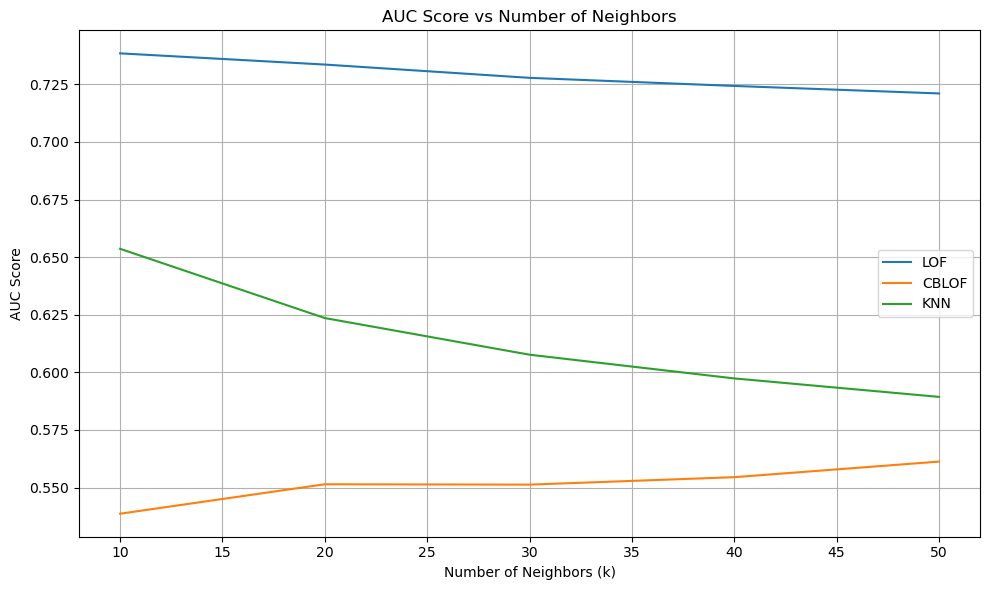

In [34]:
auc_scores_lof = []
auc_scores_cblof = []
auc_scores_knn = []
auc_scores_cof = []
n_neighbors_list = [10,20,30,40,50]
accuracy_scores_lof = []
accuracy_scores_cblof = []
accuracy_scores_knn = []

# Evaluate AUC scores for LOF, CBLOF, and KNN over multiple neighbors
for n_neighbors in n_neighbors_list:
    # LOF
    lof_model = LOF(n_neighbors=n_neighbors)
    lof_model.fit(df)
    y_scores_lof = lof_model.decision_function(df)
    lof_pred = lof_model.labels_
    auc_lof = roc_auc_score(y, y_scores_lof)

    auc_scores_lof.append(auc_lof)
    accuracy_lof = accuracy_score(y, lof_pred)
    accuracy_scores_lof.append(accuracy_lof)



    # CBLOF
    cblof_model = CBLOF(n_clusters=n_neighbors)
    cblof_model.fit(df)
    y_scores_cblof = cblof_model.decision_function(df)
    cblof_pred = cblof_model.labels_
    auc_cblof = roc_auc_score(y, y_scores_cblof)

    auc_scores_cblof.append(auc_cblof)
    accuracy_cblof = accuracy_score(y, cblof_pred)
    accuracy_scores_cblof.append(accuracy_cblof)
    
    # KNN
    knn_model = KNN(n_neighbors=n_neighbors)
    knn_model.fit(df)
    y_scores_knn = knn_model.decision_function(df)
    knn_pred = knn_model.labels_
    auc_knn = roc_auc_score(y, y_scores_knn)

    auc_scores_knn.append(auc_knn)
    accuracy_knn = accuracy_score(y, knn_pred)
    accuracy_scores_knn.append(accuracy_knn)

# Calculate mean AUC score for each model
mean_auc_lof = np.mean(auc_scores_lof)
mean_auc_cblof = np.mean(auc_scores_cblof)
mean_auc_knn = np.mean(auc_scores_knn)

mean_acc_lof = np.mean(accuracy_scores_lof)
mean_acc_cblof = np.mean(accuracy_scores_cblof)
mean_acc_knn = np.mean(accuracy_scores_knn)

plt.figure(figsize=(10, 6))

# Plot LOF AUC
plt.plot(n_neighbors_list, auc_scores_lof, label='LOF')

# Plot CBLOF AUC
plt.plot(n_neighbors_list, auc_scores_cblof, label='CBLOF')

# Plot KNN AUC
plt.plot(n_neighbors_list, auc_scores_knn, label='KNN')

# Add labels and title
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('AUC Score')
plt.title('AUC Score vs Number of Neighbors')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
print("KNN auc",mean_auc_knn)
print("LOF auc",mean_auc_lof)
print("CBLOF auc",mean_auc_cblof)
print("KNN acc",mean_acc_knn)
print("LOF acc",mean_acc_lof)
print("CBLOF acc",mean_acc_cblof)


KNN auc 0.6142949212985117
LOF auc 0.7290398142732835
CBLOF auc 0.5514014617194096
KNN acc 0.881752
LOF acc 0.8879680000000001
CBLOF acc 0.878344


In [39]:
from emmv import emmv_scores

lof_emmv = emmv_scores(lof,df)
print('lof emmv',lof_emmv['em'])

lof emmv 0.005307202000000001


In [40]:
cblof_emmv = emmv_scores(cblof,df)
print('cblof emmv',cblof_emmv['em'])

cblof emmv 0.005049802000000001


In [41]:
knn_emmv = emmv_scores(knn,df)
print('knn emmv',knn_emmv['em'])

knn emmv 0.005037922000000001
